In [1]:
library(readr)
library(mechkar)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- as.data.frame(nasa)

In [3]:
head(df)
dim(df)

lat,long,month,year,cloudhigh,cloudlow,cloudmid,ozone,pressure,surftemp,temperature
<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
36.20000,-113.8,1,1995,26.0,7.5,34.5,304,835,272.7,272.1
33.70435,-113.8,1,1995,20.0,11.5,32.5,304,940,279.5,282.2
31.20870,-113.8,1,1995,16.0,16.5,26.0,298,960,284.7,285.2
28.71304,-113.8,1,1995,13.0,20.5,14.5,276,990,289.3,290.7
26.21739,-113.8,1,1995,7.5,26.0,10.5,274,1000,292.2,292.7
23.72174,-113.8,1,1995,8.0,30.0,9.5,264,1000,294.1,293.6


[1] 41472    11

In [4]:
summary(df)

      lat              long            month            year     
 Min.   :-21.20   Min.   :-113.8   Min.   : 1.00   Min.   :1995  
 1st Qu.: -6.85   1st Qu.: -99.4   1st Qu.: 3.75   1st Qu.:1996  
 Median :  7.50   Median : -85.0   Median : 6.50   Median :1998  
 Mean   :  7.50   Mean   : -85.0   Mean   : 6.50   Mean   :1998  
 3rd Qu.: 21.85   3rd Qu.: -70.6   3rd Qu.: 9.25   3rd Qu.:1999  
 Max.   : 36.20   Max.   : -56.2   Max.   :12.00   Max.   :2000  
                                                                 
   cloudhigh       cloudlow        cloudmid         ozone      
 Min.   : 0.0   Min.   : 0.50   Min.   : 0.00   Min.   :232.0  
 1st Qu.: 1.5   1st Qu.:15.00   1st Qu.: 7.50   1st Qu.:254.0  
 Median : 8.5   Median :23.50   Median :14.00   Median :264.0  
 Mean   :12.0   Mean   :26.24   Mean   :15.27   Mean   :267.2  
 3rd Qu.:18.5   3rd Qu.:34.50   3rd Qu.:22.00   3rd Qu.:276.0  
 Max.   :62.5   Max.   :84.50   Max.   :83.50   Max.   :390.0  
                NA's   :

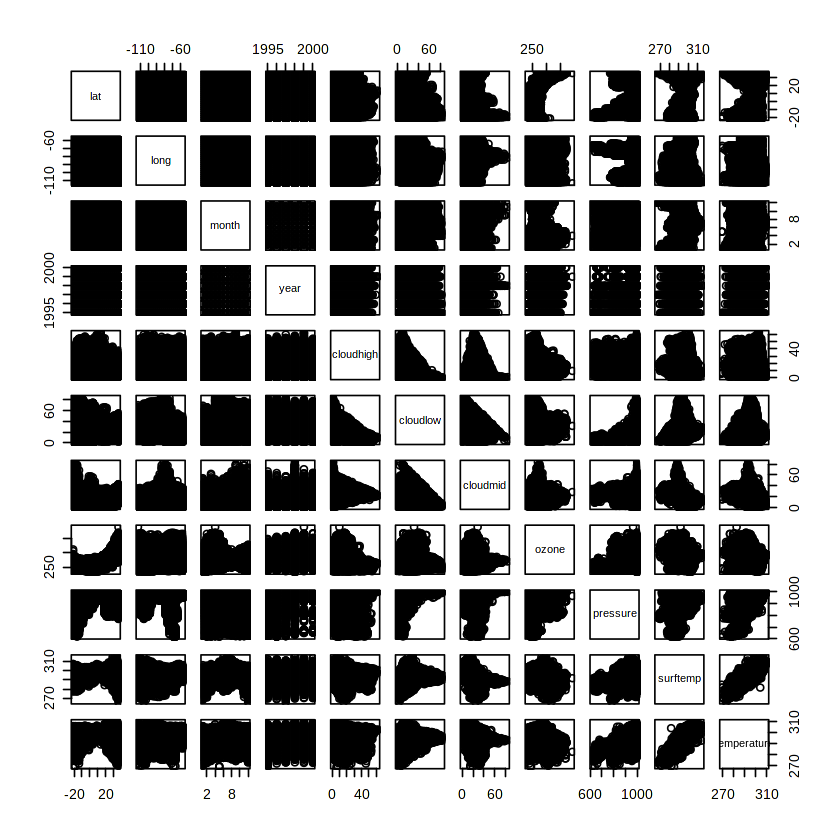

In [6]:
pairs(df)

In [7]:
df2=df

In [8]:
train_test(data=df2,train_name="train",test_name="test",prop=0.7,seed=5,tableone=TRUE)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test



  |======================================================================| 100%

You got a perfectly balanced training and test datasets

 



V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,41472,29030,12442,NA
lat,Mean (SD),7.5 (17.3),7.5 (17.3),7.5 (17.2),NA
lat,Median (IQR),7.5 (-6.9-21.9),7.5 (-6.2-23.7),7.5 (-8.7-21.2),0.92
long,Mean (SD),-85.0 (17.3),-85.0 (17.3),-85.0 (17.4),NA
long,Median (IQR),-85.0 (-99.4--70.6),-83.7 (-98.8--71.2),-86.3 (-101.3--68.7),0.933
month,Mean (SD),6.5 (3.5),6.5 (3.5),6.5 (3.5),NA
month,Median (IQR),6.5 (3.8-9.2),6.0 (4.0-9.0),7.0 (3.0-10.0),0.756
year,Mean (SD),"1,997.5 (1.7)","1,997.5 (1.7)","1,997.5 (1.7)",NA
year,Median (IQR),"1,997.5 (1,996.0-1,999.0)","1,998.0 (1,996.0-1,999.0)","1,997.0 (1,996.0-1,999.0)",0.243


In [9]:
### The error we will use is the RMSE and RMSLE
rmse <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}


In [10]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
err_res <- NULL

In [15]:
## model with only the original variables
mod1 <- lm(temperature ~., data=train)
summary(mod1)


Call:
lm(formula = temperature ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5414  -1.1222   0.0124   1.1644  16.2124 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.250e+02  1.322e+01 -32.149  < 2e-16 ***
lat         -3.642e-02  9.181e-04 -39.669  < 2e-16 ***
long         3.360e-03  7.010e-04   4.793 1.65e-06 ***
month        1.148e-01  3.253e-03  35.273  < 2e-16 ***
year         2.484e-01  6.629e-03  37.473  < 2e-16 ***
cloudhigh    2.858e-02  1.317e-03  21.704  < 2e-16 ***
cloudlow    -8.402e-02  1.077e-03 -78.026  < 2e-16 ***
cloudmid     6.319e-03  1.684e-03   3.753 0.000175 ***
ozone       -2.617e-02  8.087e-04 -32.354  < 2e-16 ***
pressure     3.378e-02  3.151e-04 107.206  < 2e-16 ***
surftemp     6.822e-01  3.006e-03 226.936  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.893 on 28935 degrees of freedom
  (84 observations deleted due to missingne

In [13]:
head(df2)

lat,long,month,year,cloudhigh,cloudlow,cloudmid,ozone,pressure,surftemp,temperature
<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
36.20000,-113.8,1,1995,26.0,7.5,34.5,304,835,272.7,272.1
33.70435,-113.8,1,1995,20.0,11.5,32.5,304,940,279.5,282.2
31.20870,-113.8,1,1995,16.0,16.5,26.0,298,960,284.7,285.2
28.71304,-113.8,1,1995,13.0,20.5,14.5,276,990,289.3,290.7
26.21739,-113.8,1,1995,7.5,26.0,10.5,274,1000,292.2,292.7
23.72174,-113.8,1,1995,8.0,30.0,9.5,264,1000,294.1,293.6
